In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ours
from solver.funcs import randomData, accuracy, plot2D
from solver.demonDataChecks import NSSVMWithChecks
import time 
import psutil
import os 

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to calculate predictions based on your accuracy function
def calculate_predictions(X, x):
    z = np.dot(X, x[:-1]) + x[-1]
    sz = np.sign(z)
    sz[sz == 0] = 1
    return sz

# Calculate predictions
y_pred = calculate_predictions(X, out['w'])
ty_pred = calculate_predictions(tX, out['w'])

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)

In [3]:
# data
dim = 0
Ex  = ('2D', '3D', 'nD')
m0  = int(4e2)
n0  = 100

# data
X, y, tX, ty = randomData(Ex[dim], m0, n0, 0)
[m, n] = X.shape

# svm
pars = {'C': 0.25, 
        's0': int(np.ceil(n * (np.log(m/n)) ** 2))}


In [4]:
# training
model = NSSVMWithChecks()
out = model.fit(X, y, pars)

    1          1.07e-01         0.53500
    2          7.72e+00         0.95500
    3          2.33e+00         0.95500
    4          1.24e-01         0.96500
    5          5.59e+00         0.95500
    6          6.90e-01         0.95500
    7          4.58e-02         0.96500
    8          5.94e-03         0.96500
    9          3.13e+00         0.95500
   10          6.07e-01         0.96000
   11          3.42e-02         0.96000
   12          9.03e-32         0.96000
Trust region active: False
Step size 1 attained: False


In [5]:
# evaluation
acc, _ = accuracy(X, out['w'], y)
tacc, _ = accuracy(tX, out['w'], ty)

In [9]:
# logging
print(f"Training  Time:             {out['time']:.3f}sec")
print(f"Training  Size:             {m}x{n}")
print(f"Training  Accuracy:         {acc*100:.2f}%")
print(f"Testing   Size:             {tX.shape[0]}x{n}")
print(f"Testing   Accuracy:         {tacc*100:.2f}%")
print(f"Number of Support Vectors:  {out['sv']}")
print(f"Trust region active: {model.trust_region_active}")
print(f"Step size taken in one step: {model.step_size_one_attained}")

if hasattr(model, 'alpha'):
    print(f"Support Vector Coefficients, alpha^*: {model.alpha}")

# If 'alpha' is part of the 'out' dictionary
if 'alpha' in out:
    print(f"Support Vector Coefficients, alpha^*: {out['alpha']}")

Training  Time:             0.024sec
Training  Size:             200x2
Training  Accuracy:         96.00%
Testing   Size:             200x2
Testing   Accuracy:         97.00%
Number of Support Vectors:  43
Trust region active: False
Step size taken in one step: False
Support Vector Coefficients, alpha^*: [-3.59945585e-03  5.56208981e-02 -7.78784500e-04  7.66713238e-02
  2.25672126e-03 -5.02650942e-03  8.52812926e-02  4.92719260e-02
  1.75543212e-01  2.50221345e-01  1.62854160e-01 -2.59983755e-03
  1.29828495e-02 -7.50361221e-04  2.45457495e-02  1.29226737e-01
 -1.41520980e-03  5.23471609e-02  3.21730529e-01 -7.10963309e-04
  8.98129384e-02  2.19931866e-01  1.08501316e-01 -3.52151738e-04
 -2.83835165e-04 -1.84321028e-03 -6.52140042e-03 -4.05228136e-04
 -7.42906516e-03 -5.00629973e-04 -3.03804639e-03 -8.33464136e-04
 -3.20394730e-03 -2.33269613e-04 -5.00064745e-03  0.00000000e+00
  1.23512378e-01 -5.59150224e-03  3.01108728e-01  4.14356218e-02
  0.00000000e+00  0.00000000e+00  0.00000000

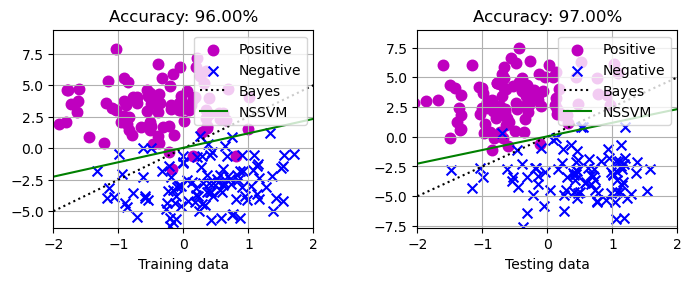

In [7]:
# plotting
if Ex[dim] == '2D' and m < 400:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    fig.subplots_adjust(left=0.12, bottom=0.14, right=0.9, top=0.8, wspace=0.4)

    plot2D(X, y, out['w'], 'NSSVM', acc, ax=axes[0])
    axes[0].set_xlabel('Training data')

    plot2D(tX, ty, out['w'], 'NSSVM', tacc, ax=axes[1])
    axes[1].set_xlabel('Testing data')

    plt.show()

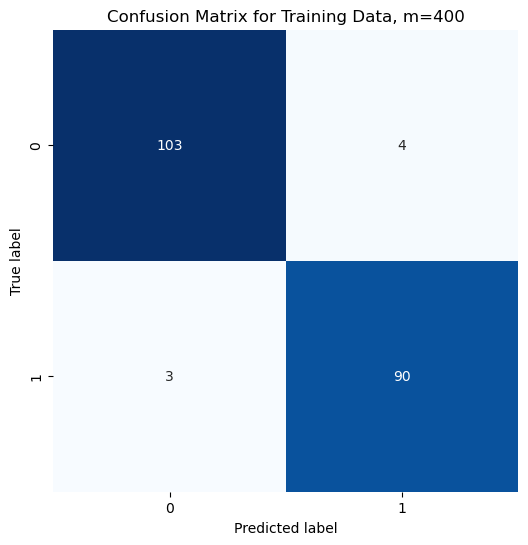

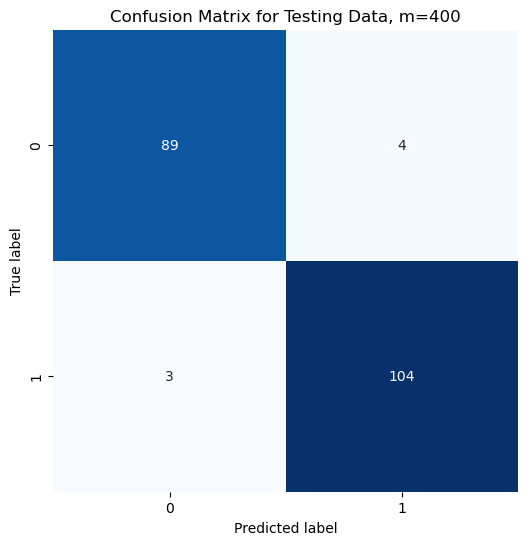

In [13]:
# Plot the confusion matrix for the training data
plot_confusion_matrix(y, y_pred, 'Confusion Matrix for Training Data, m=400')

# Plot the confusion matrix for the testing data
plot_confusion_matrix(ty, ty_pred, 'Confusion Matrix for Testing Data, m=400')

plt.show()